In [115]:
!pip install -q -U kaggle_environments

In [116]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate



In [117]:
#Example of the simple agent
#0 - rock
#1 - paper
#2 - scissors
#Агент который всегда играет камень
def rock_agent(observation, configuration):
    return 0
#Агент который всегда играет ножницы   
def scissors_agent(observation, configuration):
    return 2
#Агент который всегда играет бумагу
def paper_agent(observation, configuration):
    return 1
#Агент который копирует прошлый ход оппонента
def copy_opponent_agent(observation, configuration):
    if observation.step > 0:#если это не первый шаг
        return observation.lastOpponentAction
    else:#иначе играем рандомное значение
        return random.randrange(0, configuration.signs)
#Агент который всегда играет не так как оппонент сыграл в прошлый ход
def not_copy_agent(observation, configuration):
    if observation.step > 0:
        #вариативность в  какую сторону сделать выбор, если 0 то предыдущий вариант, если 1 то следующий
        variation = random.randrange(0, 2)
        if variation == 0:
            result = observation.lastOpponentAction - 1
        else:
            result = observation.lastOpponentAction + 1
        #проверка крайних значений, выход за пределы возможных ответов (-1 и 3)
        if result < 0:
            return 2
        if result > 2:
            return 0
        return result
    else:
        return random.randrange(0, configuration.signs)
#Агент который всегда играет случайным результатом 
def random_agent(observation, configuration):
    return random.randrange(0, configuration.signs)
#Агент который всегда чередует камень и ножницы
def rock_scissors_agent(observation, configuration):
    if observation.step % 2 == 0:
        return 0
    else:
         return 2
#Агент который всегда чредует камень и бумагу
def rock_paper_agent(observation, configuration):
    if observation.step % 2 == 0:
        return 0
    else:
         return 1
#Агент который всегда чередует бумагу и камень
def paper_rock_agent(observation, configuration):
    if observation.step % 2 == 0:
        return 1
    else:
         return 0
#Агент который всегда чередует бумагу и ножницы
def paper_scissors_agent(observation, configuration):
    if observation.step % 2 == 0:
        return 1
    else:
         return 2
#Агент который всегда чередует ножницы и бумагу
def scissors_paper_agent(observation, configuration):
    if observation.step % 2 == 0:
        return 2
    else:
         return 1
#Агент который всегда играет поочереди камень, ножницы и бумагу
def rock_paper_scissors_agent(observation, configuration):
    if observation.step % 3 == 0:
        return 2
    else:
        if observation.step % 2 == 0:
         return 1
    return 0
    


In [118]:
# записываем всех агентов в список
agents = {
    "rock_agent": rock_agent,
    "scissors_agent": scissors_agent,
    "paper_agent": paper_agent,
    "copy_opponent_agent": copy_opponent_agent,
    "not_copy_agent": not_copy_agent,
    "random_agent": random_agent,
    "rock_scissors_agent": rock_scissors_agent,
    "rock_paper_agent": rock_paper_agent,
    "paper_rock_agent": paper_rock_agent,
    "paper_scissors_agent": paper_scissors_agent,
    "rock_paper_scissors_agent": rock_paper_scissors_agent,
    "scissors_paper_agent": scissors_paper_agent
}


In [119]:
# иницилизируем функцию для запуска дуэли
def runDuel(player1, player2):
    return evaluate(
        "rps", #environment to use - no need to change
        [player1,player2], #agents to evaluate
        configuration={"episodeSteps": 100} #number of episodes
    )

In [120]:
#иницилизируем список где будет хранить прошедшие пары чтобы избежать дублей
rounds = []
#иницилизируем словарь куда будем записывать результаты турнира
allResults = {}

#функция для записи данных о турнире
def writeResult(key, value):
    global allResults
    if key in allResults:
        allResults[key] += value
    else:
        allResults[key] = value
#проходимся по списку агентов для проведения дуелей каждого с каждым
for i in agents:
    for j in agents:
        #проверяем на совпадение агентов, или играла ли эта пара
        if i==j or i + '_' + j in rounds or j +'_' + i  in rounds:
            continue
        #проводим дуэль
        result = runDuel(agents[i],agents[j])
        #запись результата
        writeResult(i,int(result[0][0]))
        writeResult(j,int(result[0][1]))
        #запоминаем пару игроков
        rounds.append(str)


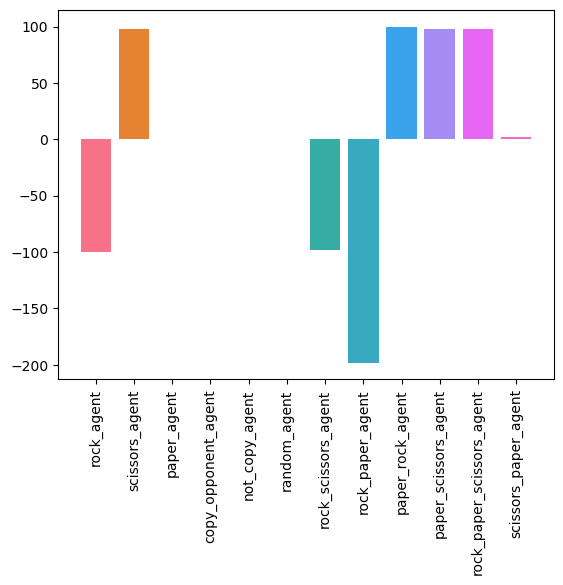

In [121]:
#иницилизируем список для вывода столбцов
ind = np.arange(len(allResults))
#получение списка палитры цветов
palette = sns.color_palette("husl", len(allResults))
#передаем данные для гистограммы
plt.bar(ind, list(allResults.values()), color=palette)
#передаем данные для подсказок по оси X
plt.xticks(ind, list(allResults.keys()),rotation=90)
#отрисовываем гистограмму
plt.show()